In [209]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
import warnings

warnings.filterwarnings("ignore")
from flaml import logger, logging

logger.setLevel(logging.WARNING)
import random

imp = pd.read_csv("Imputed.csv")
miss = pd.read_csv("Missingness_0_scaled.csv")
smote = pd.read_csv("Smote_scaled.csv")
TEST = pd.read_csv("unlabeled.csv")

cols = imp.columns
cols = cols.drop(cols[0])

test_X = TEST[cols]
testing_X = test_X.drop("hospital_death", axis=1)

imp = imp[cols]
miss = miss.drop(miss.columns[0], axis=1)
smote = smote.drop(smote.columns[0], axis=1)

imp_X = imp.drop("hospital_death", axis=1)
imp_y = imp["hospital_death"]
imp_X.drop(list(imp_X.filter(regex = 'apache')), axis = 1, inplace = True)


In [210]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
alist = []


enc = LabelEncoder()

onehotlabels = enc.fit_transform(imp_X['gender'])
le_name_mapping = dict(zip(enc.classes_, enc.transform(enc.classes_)))
alist.append(le_name_mapping)


onehotlabels2 = enc.fit_transform(imp_X['ethnicity'])
le_name_mapping2 = dict(zip(enc.classes_, enc.transform(enc.classes_)))
alist.append(le_name_mapping2)

In [211]:
imp_X['gender'] = onehotlabels
imp_X['ethnicity'] = onehotlabels2

In [212]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
rus = RandomUnderSampler(random_state=0)

over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
imp_X, imp_y = pipeline.fit_resample(imp_X, imp_y)

In [213]:
random.seed(10)
imp_x_train, imp_x_test, imp_y_train, imp_y_test = train_test_split(
    imp_X, imp_y, test_size=0.3, random_state=42
)

In [133]:
alist

[{'F': 0, 'M': 1, nan: 2},
 {'African American': 0,
  'Asian': 1,
  'Caucasian': 2,
  'Hispanic': 3,
  'Native American': 4,
  'Other/Unknown': 5,
  nan: 6}]

In [119]:
imp_X.columns

Index(['age', 'bmi', 'height', 'pre_icu_los_days', 'weight',
       'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min', 'd1_diasbp_max',
       'd1_diasbp_min', 'd1_diasbp_noninvasive_max',
       ...
       'h1_arterial_pco2_max', 'h1_arterial_pco2_min', 'h1_arterial_ph_max',
       'h1_arterial_ph_min', 'h1_arterial_po2_max', 'h1_arterial_po2_min',
       'h1_pao2fio2ratio_max', 'h1_pao2fio2ratio_min', 'gender', 'ethnicity'],
      dtype='object', length=135)

In [214]:

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

dists = {
    "C": uniform(loc=0, scale=3),
    "gamma": uniform(loc=0, scale=(3 / 171)),  # number of features
}

rbf_cv = RandomizedSearchCV(
    svm.SVC(random_state=13, kernel="rbf"),
    dists,
    n_iter=10,
    n_jobs=-1,
    scoring=["accuracy", "f1", "precision", "recall"],
    refit="accuracy",
    cv=5,
    random_state=14,
    verbose=0,
)

rbf_cv.fit(imp_x_train, imp_y_train)

rbf_cv_pred = rbf_cv.predict(imp_x_test)
rbf_cv_sc = rbf_cv.score(imp_x_test, imp_y_test)
rbf_cv_results = pd.DataFrame(rbf_cv.cv_results_)


In [199]:
imp_y_test = list(imp_y_test)

In [200]:
rbf_cv_pred = list(rbf_cv_pred)

In [175]:
imp_x_test[:1]

,age,bmi,height,pre_icu_los_days,weight,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,gender,ethnicity
54965,-0.214811,-0.943425,0.502654,-0.240765,-0.829175,-0.10945,-0.029175,-1.287755,-0.162415,-1.29822,-0.168846,-1.090354,-0.836229,-0.185405,-0.065171,-1.281082,-0.310305,-1.28645,-0.311926,-0.548692,-0.958089,0.421666,-0.046704,-0.06694,-0.077028,-0.401557,-0.092531,-0.395264,-0.092953,-0.116097,0.446066,-0.149051,-0.17297,-0.666575,-0.476028,-0.714013,-0.507664,-0.595475,-0.578226,-0.012295,-0.201429,-0.670749,-0.720481,-0.677591,-0.752398,0.066819,-1.205965,-0.674171,-0.823572,-0.096164,-0.073076,0.189027,-0.734707,0.228968,-0.743254,-0.164603,-0.043457,0.132806,0.198456,-0.215531,-0.206657,-0.32351,-0.244403,0.591763,0.807214,0.061021,0.154232,-0.663413,0.046123,0.673695,0.807567,1.096804,0.505721,0.841809,0.410625,-0.291343,-0.287599,-0.277873,-0.244083,-0.279978,-0.469594,0.43179,1.037146,1.077008,1.316799,-0.433676,-0.983909,0.066499,0.06687,-0.090737,-0.090676,-0.210413,-0.210189,0.054394,0.05487,-0.182921,-0.182717,-0.314406,-0.278744,0.039744,0.045601,-0.054093,0.030042,-0.043818,-0.337839,-0.291343,-0.287599,-0.165581,-0.164606,-0.093255,-0.090521,-0.060865,-0.032509,0.059973,0.086986,-0.159177,-0.157661,-0.129683,-0.023565,0.074162,0.131761,-0.39199,-0.288031,-0.143334,0.117125,-0.174491,-0.149356,0.08207,0.082288,-0.252173,-0.242851,-0.115343,-0.097325,1,0


In [201]:
correct = 0
wrong = 0
indicies = []
for i in range(0,27514):
    if rbf_cv_pred[i] == imp_y_test[i]:
        correct += 1
    elif rbf_cv_pred[i] != imp_y_test[i]:
        wrong +=1
        indicies.append(i)

In [202]:
imp_x_test['predicted'] = rbf_cv_pred
imp_x_test['actual'] = imp_y_test

In [203]:
new_df = pd.DataFrame()
for i in indicies:
    temp = imp_x_test[i-1:i]
    new_df = pd.concat([new_df,temp])

In [204]:
new_df[['gender','ethnicity','predicted','actual']]

,gender,ethnicity,predicted,actual
73829,1,5,0,0
87770,0,2,0,0
1364,0,2,0,0
42052,0,2,0,0
6235,1,2,0,0
...,...,...,...,...
81307,1,2,0,0
15310,1,2,0,0
63794,1,2,0,0
83180,1,2,0,0


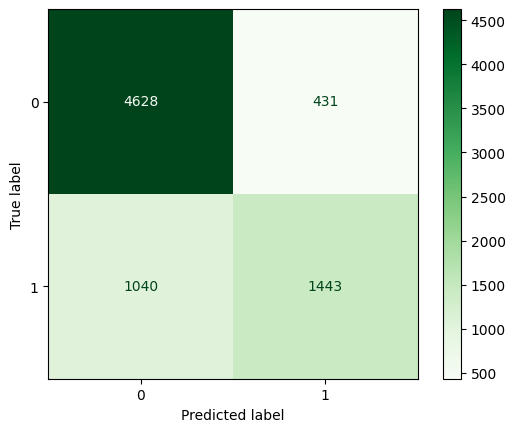

In [218]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(imp_y_test,rbf_cv_pred,labels=rbf_cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rbf_cv.classes_)
disp.plot(cmap=plt.cm.Greens)


In [217]:
pd.set_option('display.max_columns', None)
rbf_cv_sc

rbf_cv_results.loc[rbf_cv_results['rank_test_accuracy']==1]


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall
4,22.927321,0.271035,3.554491,0.018422,1.6176,0.003882,"{'C': 1.6175998122769442, 'gamma': 0.003881665...",0.803353,0.810458,0.805342,0.801932,0.801648,0.804547,0.003232,1,0.665053,0.681319,0.662062,0.659169,0.663452,0.666211,0.007797,8,0.774521,0.780088,0.791274,0.778291,0.769575,0.77875,0.007224,3,0.582697,0.60475,0.569126,0.571671,0.583051,0.582259,0.01258,8


In [ ]:
pd.set_option('display.max_columns', None)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="most_frequent")  # another: median
test_trunc_x_imp = imputer.fit_transform(testing_X)

rbf_cv_pred_test = rbf_cv.predict(test_trunc_x_imp)
rbf_cv_results_test = pd.DataFrame(rbf_cv.cv_results_)

rbf_cv_pred_test0 = rbf_cv.predict(testing_X.fillna(0))
rbf_cv_results_test0 = pd.DataFrame(rbf_cv.cv_results_)

In [104]:
df = pd.read_csv("te.csv")

categorical = []
# Get the datatype of each column
data_types = df.dtypes # int64', 'float64', 'object'

# 'Object' -> Categorical variable
categorical = data_types[data_types == 'object'].index.tolist()
# Add all the integer columns into the categorical (sine they are all categorical)
int_vars = data_types[data_types == 'int64'].index.tolist()
for var in int_vars:
    categorical.append(var)
# Add some float columns into the categorical 
# when the number of unique values is less than 11

float_vars = data_types[data_types == 'float64'].index.tolist()

for var in float_vars:
    if len(df[var].unique()) <= 10:
        categorical.append(var)


df_numeric = df.drop(columns = categorical)

# Create a dataframe only for the categorical
df_categorical = df.loc[:, categorical]

# Change all the integer column into the object type
df_categorical = df_categorical.iloc[:,:].astype('object')

In [105]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
df_numeric = df_numeric.fillna(0)

# Scale the data 

scaler = StandardScaler()
scaler.fit(df_numeric)
df_scaled = scaler.transform(df_numeric)

In [106]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
alist = []
df_cat_coded = df_categorical.copy()
for c in df_categorical.columns:
    x = df_categorical[c]
    enc = LabelEncoder()
    onehotlabels = enc.fit_transform(x)
    df_cat_coded[c] = onehotlabels
    le_name_mapping = dict(zip(enc.classes_, enc.transform(enc.classes_)))
    alist.append(le_name_mapping)



In [ ]:
df = pd.DataFrame(alist)

In [114]:
for i in range(0,len(df_categorical.columns)-1):
    am = df[i]
    am.to_csv("LE_"f"i")

KeyError: 28

In [110]:
df.to_html("Label_Encoded_cats.html")

KeyboardInterrupt: 

In [53]:
stuff = []
for c in df_cat_coded.columns:
    df = pd.DataFrame(list(zip(df_cat_coded[c],df_categorical[c])))
    stuff.append(df)


In [55]:
stuff

[       0  1
 0      2  2
 1      2  2
 2      2  2
 3      2  2
 4      2  2
 ...   .. ..
 91708  2  2
 91709  2  2
 91710  2  2
 91711  2  2
 91712  2  2
 
 [91713 rows x 2 columns],
        0  1
 0      1  1
 1      0  0
 2      0  0
 3      0  0
 4      1  1
 ...   .. ..
 91708  1  1
 91709  0  0
 91710  1  1
 91711  0  0
 91712  0  0
 
 [91713 rows x 2 columns],
         0   1
 0       4   4
 1       4   4
 2       3   3
 3       8   8
 4      15  15
 ...    ..  ..
 91708   0   0
 91709   3   3
 91710   3   3
 91711   3   3
 91712  15  15
 
 [91713 rows x 2 columns],
        0  1
 0      1  1
 1      1  1
 2      0  0
 3      2  2
 4      0  0
 ...   .. ..
 91708  1  1
 91709  1  1
 91710  0  0
 91711  0  0
 91712  2  2
 
 [91713 rows x 2 columns],
        0  1
 0      0  0
 1      0  0
 2      0  0
 3      0  0
 4      0  0
 ...   .. ..
 91708  0  0
 91709  0  0
 91710  0  0
 91711  0  0
 91712  0  0
 
 [91713 rows x 2 columns],
        0  1
 0      2  2
 1      5  5
 2      5  5

In [236]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
alist = []


enc = LabelEncoder()

onehotlabels = enc.fit_transform(TEST['gender'])
le_name_mapping = dict(zip(enc.classes_, enc.transform(enc.classes_)))
alist.append(le_name_mapping)


onehotlabels2 = enc.fit_transform(TEST['ethnicity'])
le_name_mapping2 = dict(zip(enc.classes_, enc.transform(enc.classes_)))
alist.append(le_name_mapping2)

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
rus = RandomUnderSampler(random_state=0)


In [237]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

df_final = TEST.drop(columns = categorical)

df_final = df_final.fillna(0)

# Scale the data 
df_final['ethnicity'] = onehotlabels2
df_final['gender'] = onehotlabels

scaler = StandardScaler()
scaler.fit(df_final)
df_scaled_final = scaler.transform(df_final)

In [234]:
len(df_scaled)

39308

In [232]:
len(onehotlabels2)

39308

In [242]:
df_scaled_final = pd.DataFrame(df_scaled_final,columns=df_final.columns)

In [221]:
final_X = final.drop('hospital_death',axis=1)
final_y = final['hospital_death']

In [243]:

df_scaled_final.drop(list(df.filter(regex = 'apache')), axis = 1, inplace = True)

In [244]:
df_scaled_final.columns

Index(['age', 'bmi', 'height', 'pre_icu_los_days', 'weight', 'albumin_apache',
       'apache_2_diagnosis', 'apache_3j_diagnosis', 'bilirubin_apache',
       'bun_apache',
       ...
       'h1_arterial_ph_max', 'h1_arterial_ph_min', 'h1_arterial_po2_max',
       'h1_arterial_po2_min', 'h1_pao2fio2ratio_max', 'h1_pao2fio2ratio_min',
       'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob',
       'ethnicity', 'gender'],
      dtype='object', length=157)

In [ ]:
pr = rbf_cv.fit(df_scaled_final)

In [17]:
random.seed(402)
final_x_train, final_x_test, final_y_train, final_y_test = train_test_split(
    final_X, final_y, test_size=0.3, random_state=42
)

In [21]:
final_x_train.dtypes

ethnicity                 object
gender                    object
hospital_admit_source     object
icu_admit_source          object
icu_stay_type             object
                          ...   
h1_arterial_ph_min       float64
h1_arterial_po2_max      float64
h1_arterial_po2_min      float64
h1_pao2fio2ratio_max     float64
h1_pao2fio2ratio_min     float64
Length: 153, dtype: object

In [ ]:
dists = {
    "C": uniform(loc=0, scale=3),
    "gamma": uniform(loc=0, scale=(3 / 171)),  # number of features
}

rbf_cv_final = RandomizedSearchCV(
    svm.SVC(random_state=13, kernel="rbf"),
    dists,
    n_iter=10,
    n_jobs=-1,
    scoring=["accuracy", "f1", "precision", "recall"],
    refit="accuracy",
    cv=5,
    random_state=14,
    verbose=0,
)

rbf_cv_final.fit(final_x_train, final_y_train)

rbf_cv_pred_final = rbf_cv.predict(final_x_test)
rbf_cv_sc_final = rbf_cv.score(final_x_test, final_y_test)
rbf_cv_results_final = pd.DataFrame(rbf_cv_final.cv_results_)

In [ ]:
rbf_cv_sc_final

In [ ]:
rbf_cv_results_final